In [88]:
# Libraries
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
import random

In [89]:
# Creating a Class that will hold the information of the planetary system objects such as planets and stars
class SystObj:
    def __init__(self, mass = float, position = np.array, momentum = np.array):
        self.mass = mass
        self.position = position
        self.momentum = momentum

# Creating a function that calculates gravitational force between objects
def gravforce(G = float, obj1 = SystObj, obj2 = SystObj):
    '''Calculates the gravitational force between two objects.'''
    # Distance vector between the two objects
    dis_vec = obj1.position - obj2.position
    # Calculating the magnitude of the distance vector
    dis_mag = np.linalg.norm(dis_vec)
    # Calculating the unit distance vector:
    unit_vec = dis_vec/dis_mag
    # Calculating the force vector:
    force_vec = -1*G*(obj1.mass*obj2.mass/dis_mag**2)*unit_vec
    return force_vec

def OnePlanetSym(time = int, star = SystObj, planet = SystObj, L1 = SystObj, L2 = SystObj, L3 = SystObj, L4 = SystObj, L5 = SystObj, G = float):
    '''Simulates the dynamics of a one-planet one-star system. Time is given in years'''
    daysec = 0.0001
    dt = 1*daysec # The timestep
    t = 0
    
    star_position_history = [list(star.position)] # The star's positions at given time
    planet_position_history = [list(planet.position)] # The planet's position at given time
    L1_position_history = [list(L1.position)]
    L2_position_history = [list(L2.position)]
    L3_position_history = [list(L3.position)]
    L4_position_history = [list(L4.position)]
    L5_position_history = [list(L5.position)]
    time_list = [t] # time
    
    # Simulation
    while t<time:
        # Calculate the force between objects
        L1force = gravforce(G, L1, star) + gravforce(G, L1, planet)
        L2force = gravforce(G, L2, star) + gravforce(G, L2, planet)
        L3force = gravforce(G, L3, star) + gravforce(G, L3, planet)
        L4force = gravforce(G, L4, star) + gravforce(G, L4, planet)
        L5force = gravforce(G, L5, star) + gravforce(G, L5, planet)
        starforce = gravforce(G, star, planet)
        planetforce = gravforce(G, planet, star)
        # Update momentum:
        L1.momentum = L1.momentum + L1force*dt
        L2.momentum = L2.momentum + L2force*dt
        L3.momentum = L3.momentum + L3force*dt
        L4.momentum = L4.momentum + L4force*dt
        L5.momentum = L5.momentum + L5force*dt
        star.momentum = star.momentum + starforce*dt 
        planet.momentum = planet.momentum + planetforce*dt 
        # Update position
        L1.position = L1.position + (L1.momentum/L1.mass)*dt
        L2.position = L2.position + (L2.momentum/L2.mass)*dt
        L3.position = L3.position + (L3.momentum/L3.mass)*dt
        L4.position = L4.position + (L4.momentum/L4.mass)*dt
        L5.position = L5.position + (L5.momentum/L5.mass)*dt
        star.position = star.position + (star.momentum/star.mass)*dt 
        planet.position = planet.position + (planet.momentum/planet.mass)*dt
        # Record the position of the objects 
        star_position_history.append(list(star.position))
        planet_position_history.append(list(planet.position))
        L1_position_history.append(list(L1.position))
        L2_position_history.append(list(L2.position))
        L3_position_history.append(list(L3.position))
        L4_position_history.append(list(L4.position))
        L5_position_history.append(list(L5.position))
        # Calculating energies:

        t +=dt
        time_list.append(t)

    return np.array(star_position_history), np.array(planet_position_history), np.array(L1_position_history), np.array(L2_position_history), np.array(L3_position_history), np.array(L4_position_history), np.array(L5_position_history), np.array(time_list)


# Lagrange Points:
Lagrange points are equilibrium points in the vicinity of two orbiting masses. The coordinates of these are:
$$\text{L}_1: \left(R\left[1-\left(\frac{\alpha}{3}\right)^{1/3}\right],0\right)$$
$$\text{L}_2: \left(R\left[1+\left(\frac{\alpha}{3}\right)^{1/3}\right],0\right)$$
$$\text{L}_3: \left(-R\left[1+\left(\frac{5\alpha}{12}\right)\right],0\right)$$
$$\text{L}_4: \left(\frac{R}{2}\left[\frac{M_1-M_2}{M_1+M_2}\right],\frac{\sqrt{3}}{2}R\right)$$
$$\text{L}_5: \left(\frac{R}{2}\left[\frac{M_1-M_2}{M_1+M_2}\right],-\frac{\sqrt{3}}{2}R\right)$$
where $R$ is the distance between the masses and:
$$\alpha = \frac{M_2}{M_1+M_2}$$

In [90]:
def LagrangePointCalculator(planet = SystObj, star = SystObj):
    '''This function calculates the postion of the Lagrange points of a 2 body system in 2D.'''
    # auxiliary values:
    R = np.linalg.norm(planet.position - star.position)
    alpha = planet.mass / (planet.mass + star.mass)
    R1 = (np.sqrt(3)/2)*R
    # Lagrange points:
    L1 = np.array([R*(1- (alpha/3)**(1/3)), 0])
    L2 = np.array([R*(1+ (alpha/3)**(1/3)), 0])
    L3 = np.array([-R*(1+ (5/12)*alpha),0])
    L4 = np.array([(R/2)*((star.mass-planet.mass)/(star.mass+planet.mass)), R1])
    L5 = np.array([(R/2)*((star.mass-planet.mass)/(star.mass+planet.mass)), -R1])
    
    return L1, L2, L3, L4, L5

In [91]:
G = 1
star_mass = 10000
Planet_mass = 1
Planet_distance = 1
Planet_speed = 100
planet_momenta = Planet_speed*Planet_distance

planet =  SystObj(Planet_mass, np.array([Planet_distance,0]), np.array([0,planet_momenta]))
star = SystObj(star_mass, np.array([0,0]), np.array([0,0]))

L1, L2, L3, L4, L5 = LagrangePointCalculator(planet, star)
L1origin = L1.copy()
L2origin = L2.copy()
L3origin = L3.copy()
L4origin = L4.copy()
L5origin = L5.copy()
# Lets create a sattelite that is on a Lagrange point:
Lag1 = SystObj(0.01, L1, np.array([0,0]))
Lag2 = SystObj(0.01, L2, np.array([0,0]))
Lag3 = SystObj(0.01, L3, np.array([0,0]))
Lag4 = SystObj(0.01, L4, np.array([0,0]))
Lag5 = SystObj(0.01, L5, np.array([0,0]))

Lag1.momentum = planet.momentum/planet.mass*Lag1.mass
Lag1.momentum = Lag1.momentum*np.linalg.norm(Lag1.position-star.position)/np.linalg.norm(planet.position-star.position)
Lag2.momentum = planet.momentum/planet.mass*Lag2.mass
Lag2.momentum = Lag2.momentum*np.linalg.norm(Lag2.position-star.position)/np.linalg.norm(planet.position-star.position)
Lag3.momentum = -planet.momentum/planet.mass*Lag3.mass
Lag3.momentum = Lag3.momentum*np.linalg.norm(Lag3.position-star.position)/np.linalg.norm(planet.position-star.position)
Lag4momx = -planet.momentum[1]*np.sin(np.pi/3)/planet.mass*Lag4.mass
Lag4momy =  planet.momentum[1]*np.cos(np.pi/3)/planet.mass*Lag4.mass
Lag5momx = -planet.momentum[1]*np.sin(-np.pi/3)/planet.mass*Lag5.mass
Lag5momy =  planet.momentum[1]*np.cos(-np.pi/3)/planet.mass*Lag5.mass
Lag4.momentum = np.array([Lag4momx, Lag4momy])
Lag5.momentum = np.array([Lag5momx, Lag5momy])

print(Lag4.momentum, planet.momentum)

sp, pp, L1, L2, L3, L4, L5, t = OnePlanetSym(0.3, star, planet, Lag1, Lag2, Lag3, Lag4, Lag5, G)

[-0.8660254  0.5      ] [  0 100]


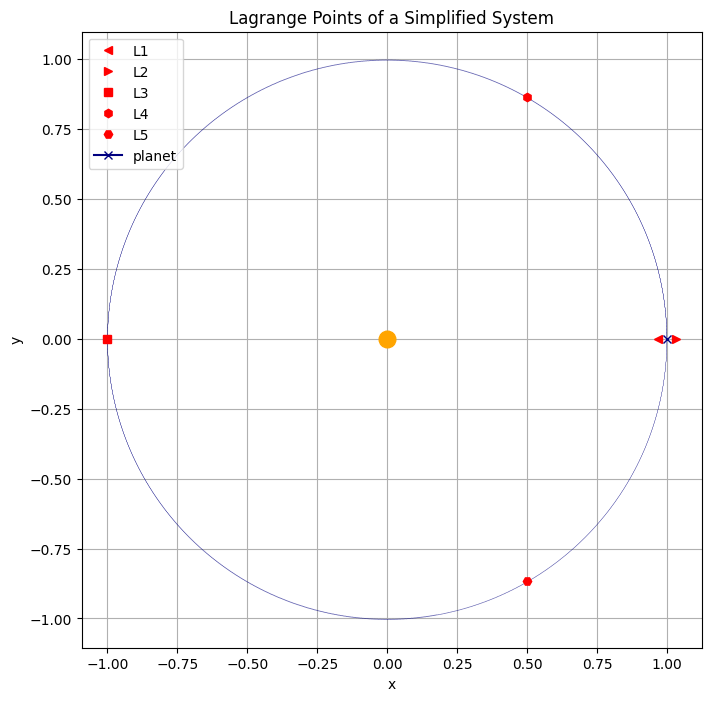

In [92]:
fig = plt.figure(figsize=(8,8))
plt.plot(pp[:,0], pp[:,1], color = "navy", ls = "-.", lw = "0.1")
plt.plot(L1origin[0], L1origin[1], marker = "<", color = "red", label = "L1", ls = "")
plt.plot(L2origin[0], L2origin[1], marker = ">", color = "red", label = "L2", ls = "")
plt.plot(L3origin[0], L3origin[1], marker = "s", color = "red", label = "L3", ls = "")
plt.plot(L4origin[0], L4origin[1], marker = "h", color = "red", label = "L4", ls = "")
plt.plot(L5origin[0], L5origin[1], marker = "H", color = "red", label = "L5", ls = "")
plt.plot(pp[0,0], pp[0,1], ls = "-", marker = "x", color = "navy", label = "planet")
plt.plot(sp[0,0], sp[0,1], ls = "", marker = "o", markersize = 12, color = "orange")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lagrange Points of a Simplified System")
#plt.plot(L1[:,0], L1[:,1], color = "purple", label = "L1 orbit")
#plt.plot(L2[:,0], L2[:,1], color = "blue", label = "L2 orbit")
#plt.plot(L3[:,0], L3[:,1], color = "red", label = "L3 orbit")
#plt.plot(L4[:,0], L4[:,1])
#plt.plot(L5[:,0], L5[:,1])
plt.axis("equal")
plt.grid()
plt.legend(loc = "upper left")

# Lagrange Animation

C:\Users\jmton\AppData\Local\Temp\ipykernel_47796\2585201548.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  l_p1, = plt.plot([],[], 'k-', color = "blue", lw = 0.5,)
C:\Users\jmton\AppData\Local\Temp\ipykernel_47796\2585201548.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  l_L1, = plt.plot([],[], 'k-', color = "red", lw = 1, ls = "dotted")
C:\Users\jmton\AppData\Local\Temp\ipykernel_47796\2585201548.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  l_L1, = plt.plot([],[], 'k-', color = "red", lw = 1, ls = "dotted")
C:\Users\jmton\AppData\Local\Temp\ipykernel_47796\2585201548.py:14: UserWarning: linestyle is redundantly defined b

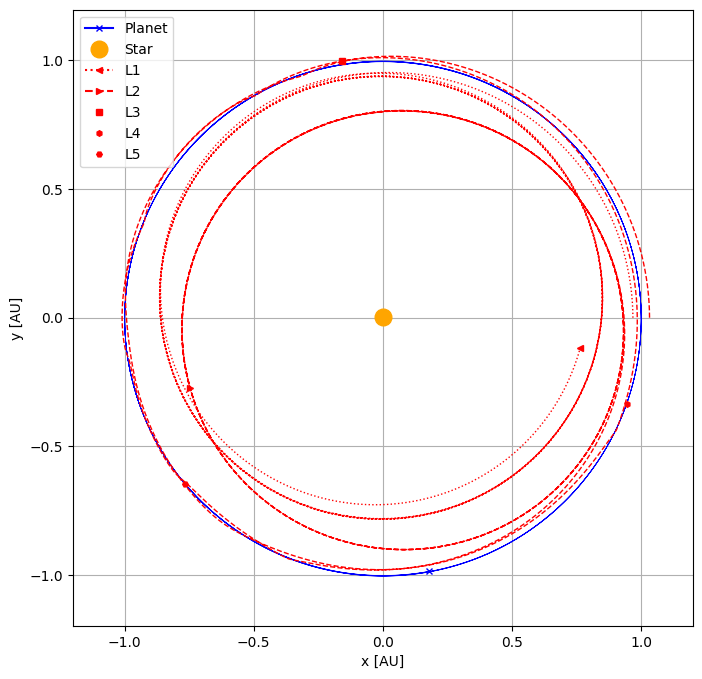

In [93]:
posx_planet1 = pp[:,0]
posy_planet1 = pp[:,1]
posx_sun = sp[:,0]
posy_sun = sp[:,1]

fig = plt.figure(figsize=(8,8))

l_p1, = plt.plot([],[], 'k-', color = "blue", lw = 0.5,)
point_p1, = plt.plot([], [], marker="x", markersize=4, markeredgecolor="blue", markerfacecolor="blue", label = "Planet", color = "blue", ls = "-")
point_s, = plt.plot([], [], marker="o", markersize=12, markeredgecolor="orange", markerfacecolor="orange", color = "orange", label = "Star", ls = "")
point_L1, = plt.plot([], [], marker="<", markersize=4, markeredgecolor="red", markerfacecolor="red", color = "red", label = "L1", ls = "dotted")
l_L1, = plt.plot([],[], 'k-', color = "red", lw = 1, ls = "dotted")
point_L2, = plt.plot([], [], marker=">", markersize=4, markeredgecolor="red", markerfacecolor="red", color = "red", label = "L2", ls = "dashed")
l_L2, = plt.plot([],[], 'k-', color = "red", lw = 1, ls = "dashed")
point_L3, = plt.plot([], [], marker="s", markersize=4, markeredgecolor="red", markerfacecolor="red", color = "red", label = "L3", ls = "")
point_L4, = plt.plot([], [], marker="h", markersize=4, markeredgecolor="red", markerfacecolor="red", color = "red", label = "L4", ls = "")
point_L5, = plt.plot([], [], marker="H", markersize=4, markeredgecolor="red", markerfacecolor="red", color = "red", label = "L5", ls = "")
l_s, = plt.plot([],[], 'k-', color = "orange")
plt.xlim(-max(posx_planet1)*1.2,max(posx_planet1)*1.2)
plt.ylim(-max(posy_planet1)*1.2,max(posy_planet1)*1.2)
plt.xlabel("x [AU]")
plt.ylabel("y [AU]")
plt.legend(loc = "upper left")
writer = PillowWriter(fps = 30)
plt.grid()

xplanet1 = []
yplanet1 = []
xL1 = []
yL1 = []
xL2 = []
yL2 = []
xstar = []
ystar = []
with writer.saving(fig, "Lagrange.gif", 100):
    for i in range(0,len(posx_planet1)):
        xplanet1.append(posx_planet1[i])
        yplanet1.append(posy_planet1[i])
        xL1.append(L1[:,0][i])
        yL1.append(L1[:,1][i])
        xL2.append(L2[:,0][i])
        yL2.append(L2[:,1][i])
        xstar.append(posx_sun[i])
        ystar.append(posy_sun[i])

        l_p1.set_data(xplanet1, yplanet1)
        l_L1.set_data(xL1, yL1)
        l_L2.set_data(xL2, yL2)
        l_s.set_data(xstar, ystar)
        writer.grab_frame()

        point_p1.set_data(posx_planet1[i], posy_planet1[i])
        point_L1.set_data(L1[:,0][i], L1[:,1][i])
        point_L2.set_data(L2[:,0][i], L2[:,1][i])
        point_L3.set_data(L3[:,0][i], L3[:,1][i])
        point_L4.set_data(L4[:,0][i], L4[:,1][i])
        point_L5.set_data(L5[:,0][i], L5[:,1][i])
        point_s.set_data(posx_sun[i], posy_sun[i])